In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load training and test datasets
df_train= pd.read_csv("train.csv")
df_test= pd.read_csv("cosmictest.csv")

In [3]:
# Check for missing values
print("Missing values in training data:")
print(df_train.isnull().sum())

Missing values in training data:
Atmospheric Density              2984
Surface Temperature              3032
Gravity                          2984
Water Content                    3077
Mineral Abundance                2921
Orbital Period                   2997
Proximity to Star                2945
Magnetic Field Strength          3058
Radiation Levels                 3021
Atmospheric Composition Index    2942
Prediction                       3039
dtype: int64


In [4]:
#  Deleting nan values
df_train = df_train.dropna(subset=["Atmospheric Density"], axis=0)
df_train = df_train.dropna(subset=["Surface Temperature"], axis=0)
df_train = df_train.dropna(subset=["Gravity"], axis=0)
df_train = df_train.dropna(subset=["Water Content"], axis=0)
df_train = df_train.dropna(subset=["Mineral Abundance"], axis=0)
df_train = df_train.dropna(subset=["Orbital Period"], axis=0)
df_train = df_train.dropna(subset=["Proximity to Star"], axis=0)
df_train = df_train.dropna(subset=["Magnetic Field Strength"], axis=0)
df_train = df_train.dropna(subset=["Radiation Levels"], axis=0)
df_train = df_train.dropna(subset=["Atmospheric Composition Index"], axis=0)
df_train = df_train.dropna(subset=["Prediction"], axis=0)

In [5]:
#  Define Class Mapping
class_mapping = {
    0: "Bewohnbar:habitable", 1: "Terraformierbar:Terraformable", 2: "Rohstoffreich:Rich in raw materials", 
    3: "Wissenschaftlich:Scientific", 4: "Gasriese:Gas giant", 5: "Wüstenplanet:desert planet", 6: "Eiswelt:Ice world", 
    7: "Toxischetmosäre:Toxic", 8: "Hohestrahlung:High radiation", 9: "Toterahswelt"
}

In [6]:
# checking shape of dataframe
df_train.shape

(34059, 11)

In [7]:
#Extract features and target
x_train = df_train.iloc[:,:-1]
y_train = df_train["Prediction"].astype(int)
x_test = df_test.loc[:,:"Atmospheric Composition Index"]

In [8]:
# Convert categorical string columns to numeric
for col in ["Magnetic Field Strength", "Radiation Levels"]:
    x_train[col] = x_train[col].str.extract(r'(\d+)').astype(int)
    x_test[col] = x_test[col].str.extract(r'(\d+)').astype(int)

In [9]:
#  Data Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
# Convert scaled data back to DataFrame
x_train = pd.DataFrame(x_train, columns=df_train.columns[:-1])
x_test = pd.DataFrame(x_test, columns=df_test.columns)

In [11]:
# Train the Model
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train , y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Save the trained model and scaler
joblib.dump(rf, "planet_classifier.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler saved.")

Model and scaler saved.


In [13]:
 ## Model Evaluation (on Training Data)
y_train_pred = rf.predict(x_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.9999706391849438
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3313
           1       1.00      1.00      1.00      3852
           2       1.00      1.00      1.00      3409
           3       1.00      1.00      1.00      3502
           4       1.00      1.00      1.00      3320
           5       1.00      1.00      1.00      3036
           6       1.00      1.00      1.00      3382
           7       1.00      1.00      1.00      3483
           8       1.00      1.00      1.00      3332
           9       1.00      1.00      1.00      3430

    accuracy                           1.00     34059
   macro avg       1.00      1.00      1.00     34059
weighted avg       1.00      1.00      1.00     34059



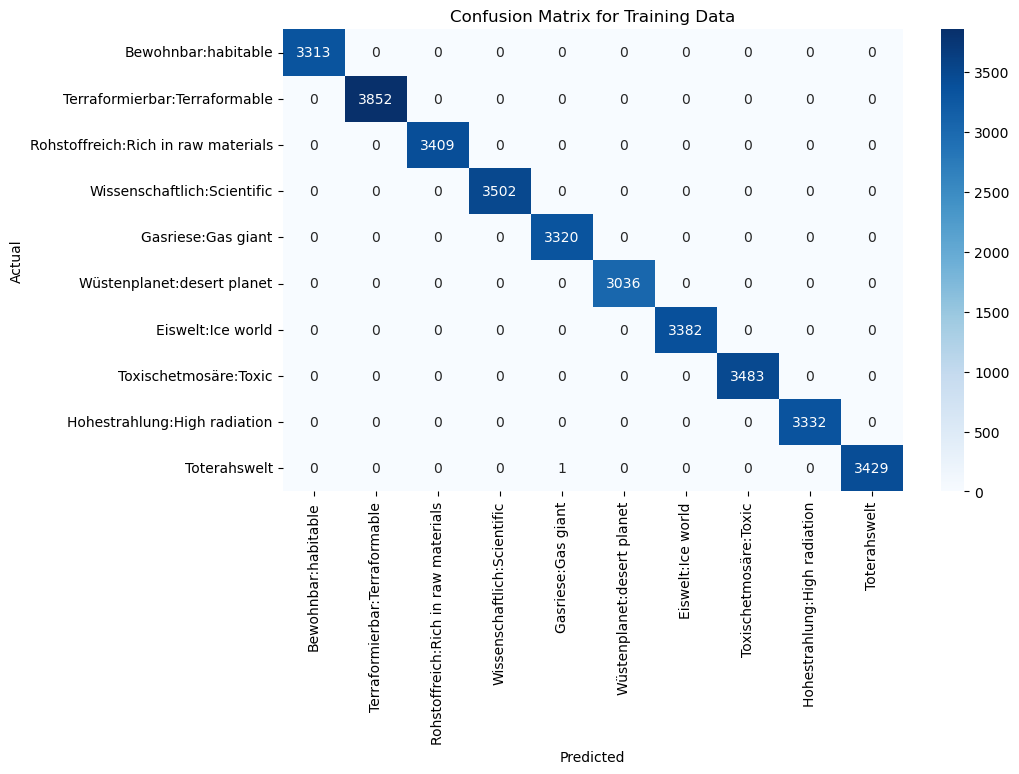

In [14]:
#Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Training Data")
plt.show()

In [15]:
# Predict on Test Data
y_pred = rf.predict(x_test)

In [16]:
df_submission = pd.DataFrame({
    "Planet_ID": df_test.index,  # Assuming row index as Planet_ID
    "Predicted_Class": [class_mapping[pred] for pred in y_pred]  # Map predictions to class names
})

In [17]:
df_submission.to_csv("submission.csv", index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv
